# Image Classification with MNIST

To begin exploring what modern **neural networks** are capable of we'll be working with the **Keras** library. Keras is a machine learning library built on top of **TensorFlow**, Google's machine learning framework. 

Get relevant **keras** modules with `import` statements.
The library `matplotlib` is used to import `pyplot` module to draw graphs. 

In [37]:
from os import environ
environ['KMP_DUPLICATE_LIB_OK']='True'

# Disable Tensorflow from logging warnings and errors, but not fatal errors
environ['TF_CPP_MIN_LOG_LEVEL'] = "3"

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical

from matplotlib import pyplot as plt
# matplotlib library depends on numpy library because many matplotlib functions 
# take numpy arrays as inputs or return numpy arrays.


The **MNIST** dataset, short for ***Modified National Institue of Standards and Technology*** dataset, is a dataset comprised of
- 70,000 images of hand-written digits
    - Foreground color of the hand-written digits is white
    - Background color of each image is black.

It is sometimes referred to as the "hello world" of machine learning. Keras has built-in support for fetching the MNIST dataset with a simple function call, `load_data()`, available through 
`keras.datasets` module. 

In [38]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

First, let's take a look at the first 16 images from the dataset. 

We use functions in the `pyplot` module of the `matlibplot` library:
- `subplot()`, `xticks()`, `imshow()`, and `show()`

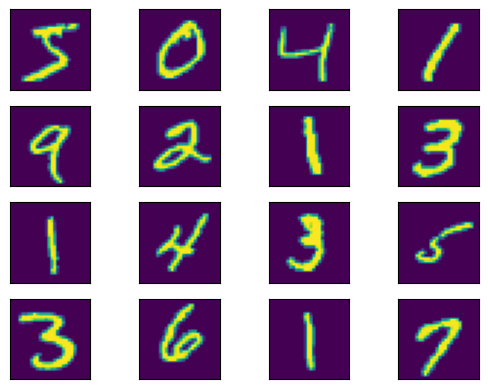

In [39]:
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(x_train[i])
plt.show()

#### Challenge

MNIST hand-written digits should be white, and the background should be black. 

Why are they showed here as yellowish with green margins? Why is the background purple?

----

What do the train and test datasets look like? We examine their size and 
the height and width of each image in the dataset.

In [40]:
train_size, height, width = x_train.shape
test_size = x_test.shape[0]

print(f"Number of images in train set: {train_size}")
print(f"Number of images in test set: {test_size}")
print(f"Height of image (in pixels): {height}")
print(f"Width of image (in pixels): {width}")

Number of images in train set: 60000
Number of images in test set: 10000
Height of image (in pixels): 28
Width of image (in pixels): 28


The MNIST dataset contains 60,000 train images and 10,000 test images. 

An image consists of 28x28 pixel values (total of 784). A pixel value ranges from 0 to 255.  

#### Question
- Why is the pixel an integer between 0 and 255?

----

Why is it important that we reserve images for testing? Wouldn't it be beneficial to give the model as much data as possible?

In order to get reliable results when testing the accuracy of a model, we need to evaluate it on images it has never seen before. If we tested it on images it has been trained on, the model would end up overperforming and the test results would be inaccurate.

Before we can make use of the training dataset images, we first have to make some changes so our neural network can make use of it. 

Let's take another look at one of our train images. Earlier, we found out that each image is 28x28 pixels. With the help of `matplotlib`, we can visualize the images. 

#### Questions
- What is the representation of these images in this program? What's the data type of `x_train`, for example? 
- How can you find out? 
- Why do we need to reshape `x_train` and `x_test`?

---

In [41]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

#### Challenge
Is there a simpler way in Keras to flatten the input image dataset? 

----

Next, we convert the data type of each pixel value to 32-bit floating point data type `float32`. TensorFlow is optimized for 32-bit floating point numbers, so that's the format we need our dataset to be in.

#### Question
What's the original datatype of each pixel value? How do know? 

----

In [42]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

Now that we represent the pixels as floating point numbers, we're able to normalize the values in the range 0 to 1 by dividing the pixel value by 255.   This is done to speed up training:
- values closer to 1 represent the white-ish color associated with the hand-written digit. 
- values closer to 0 can safely be associated with the image background

In [43]:
x_train /= 255
x_test /= 255

Now that our image data is in order, we have to make a change to the **class labels** represented by the  `y_train` and `y_test`. 

Right now, the class labels consist of a single digit ranging from `0` to`9`. We'll be using **softmax** to make our predictions, so we need to change these class values into arrays.

In [44]:
number_classes = 10
y_train = to_categorical(y_train, number_classes)
y_test = to_categorical(y_test, number_classes)

#### Question
Finally, we get to build our neural network. We'll start by instantiating a Keras **Sequential model**.

Why is this type of model a good choice for our problem? 

---

In [45]:
model = Sequential()

First, we define the input layer. This is the layer that recieves the image dataset. It has 784 neurons, for each grayscale pixel value. Along with the input layer, we create a hiddne layer of 512 neurons. Each neuron on the hidden layer receives input values from the 784 inputs. 

In [46]:
model.add(Dense(512, input_shape=(784,)))

#### Challenge
The statement `model.add(Dense(512, input_shape(784,)))` does two things. 

How can we decompose it into two separate statements? It will improve clarity and readability. 

---

The choice of 512 neurons is fairly arbitrary, but keep in mind that we need enough neurons to successfully differentiate between the image classes. Feel free the change the number of neurons and compare the final score. 

In [47]:
model.add(Activation("relu"))

The hidden layer needs to have an **actiation function**. We choose the **rectified linear unit (ReLU)** activation function. 

The benefit of using this function is the speed of training. This activation function is as simple as max(0, x): 
- any value below 0 is set to 0 and passed to the next layer
- non-0 values are passed to the next layer modified by the **weight** (or **parameter**) associated with each connection from the input layer. 

In [48]:
model.add(Dropout(0.2))


To improve our model's resiliency, we have 20% of our neurons deactivated (or dropped out) at any given time. This is done to prevent the model from becoming overly reliant on specific neurons, which can result in overfitting to the training data.

We will add a second hidden layer with another 512 neurons. Note that these neurons are recieving the output values of the previous layer, not the image data itself. We will use the same activation function and dropout rate.

In [49]:
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.2))

For our output layer, we use only 10 neurons - one for each class that the model "classifies" a given input into. 

The final activation function is **softmax**. 

In [50]:
model.add(Dense(10))
model.add(Activation("softmax"))

What is **softmax**? Consider the following output array. This array represents the class `0`. 

    [ 1, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
    
Similarly, the following array represents the class `9`:
    
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 1 ]

When predicting the class, **softmax** assigns a probility or likelihood to each of the 10 classes. The class with the greatest probability is the predicted class.

The following example output would predict the class `1`:
    
    [ 0, 0.8, 0, 0, 0.05, 0, 0, 0.15, 0, 0 ]

Let's take a look at our model.

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 activation_7 (Activation)   (None, 512)               0         
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

#### Challenge
- Why the number of parameters for the 1st hidden layer is 401,920?
- Why the numnber of parameters for the 2nd hidden layer is 262,656?
- Why the number of parameters for the 3rd hidden layer is 5130?

Before we can train our model, Keras needs to compile it. This is done to improve computational efficiency by removing the need for Python's interpretor. 

To compile the model, we specify:
- An algorithm that optimize the weights during training
    - We use `adam` optimization algorithm.
- A loss function that the algorithm tries to minimize during training. 
    - The function takes into account the difference between the **actual** and **predicted** values. 
    - We use `categorical_crossentropy`, which alculates the differene between two probability distributions: 
        - the "true" distribution and 
        - output of the **softmax** function in the model.
- A metric that the compiled model will produce. 
    - We choose "accuracy" as a metric. 

In [52]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

We're ready to train our model by calling  `model.fit()` Keras function. 

The call requires the following **keyworded parameters**:
- `batch_size`: how many images are passed to the model "per gradient update". 
    - We don't want to pass the model 60,000 images all at once! 
    - Batch size can vary based on the computer's resources and the type of data we're dealing with.
    - A general rule would be to make it a power of 2 to improve performance. 
    - If unspecified, will default to 32.
    - We choose 128.
- `epoch`: how many times the model will train on the entire dataset.
    - We choose 5. 
    - It's important not to train for too many epochs, otherwise the model will overfit to the train set and perform poorly on the test set!

#### Challenge
What does it mean to train the model "per gradient update"? 

---

In [53]:
model.fit(x_train, y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2485 - accuracy: 0.9256
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1022 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0694 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0554 - accuracy: 0.9822
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0474 - accuracy: 0.9842


Now that we've trained our model, let's see how it performs on the test set!

In [54]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0621 - accuracy: 0.9805
Test loss: 0.06214132159948349
Test accuracy: 0.9804999828338623
